In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression


In [47]:
df = pd.read_csv('project_1.csv')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27374 entries, 0 to 27373
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   time        27374 non-null  object 
 1   TREFMXAV_U  27374 non-null  float64
 2   FLNS        27374 non-null  float64
 3   FSNS        27374 non-null  float64
 4   PRECT       27374 non-null  float64
 5   PRSN        27374 non-null  float64
 6   QBOT        27374 non-null  float64
 7   TREFHT      27374 non-null  float64
 8   UBOT        27374 non-null  float64
 9   VBOT        27374 non-null  float64
 10  lat         27374 non-null  float64
 11  lon         27374 non-null  float64
dtypes: float64(11), object(1)
memory usage: 2.5+ MB


In [49]:
df.isnull().sum()

time          0
TREFMXAV_U    0
FLNS          0
FSNS          0
PRECT         0
PRSN          0
QBOT          0
TREFHT        0
UBOT          0
VBOT          0
lat           0
lon           0
dtype: int64

In [50]:
X = df.select_dtypes(include=["float64"]).dropna()

In [51]:
X.columns

Index(['TREFMXAV_U', 'FLNS', 'FSNS', 'PRECT', 'PRSN', 'QBOT', 'TREFHT', 'UBOT',
       'VBOT', 'lat', 'lon'],
      dtype='object')

In [52]:
# Calculate the R²
r2_values = {}
for col in X.columns:
    X_other = X.drop(columns=[col])
    y = X[col]
    
    model = LinearRegression()
    model.fit(X_other, y)
    
    r2_values[col] = model.score(X_other, y)

In [53]:
# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["R^2"] = [r2_values[col] for col in X.columns]
vif_data["VIF"] = [1 / (1 - r2) if r2 < 1 else np.inf for r2 in vif_data["R^2"]]
# VIF DESC
vif_data_sorted = vif_data.sort_values(by="VIF", ascending=False)

# VIF print out
print(vif_data_sorted)


       Feature       R^2        VIF
10         lon  1.000000        inf
6       TREFHT  0.980268  50.678971
0   TREFMXAV_U  0.977066  43.603159
5         QBOT  0.910112  11.124985
2         FSNS  0.866432   7.486831
1         FLNS  0.819661   5.545101
3        PRECT  0.321318   1.473445
8         VBOT  0.217953   1.278695
7         UBOT  0.178580   1.217403
4         PRSN  0.049983   1.052613
9          lat  0.000000   1.000000


TREFMXAV_U & TREFHT are very high

In [54]:
X1 = df.select_dtypes(include=["float64"]).drop(columns=["TREFHT","QBOT"], errors="ignore").dropna()
# Calculate R²
r2_values1 = {}
for col in X1.columns:
    X1_other = X1.drop(columns=[col])
    y = X1[col]
    
    model = LinearRegression()
    model.fit(X1_other, y)
    
    r2_values1[col] = model.score(X1_other, y)
# Calculate VIF
vif_data1 = pd.DataFrame()
vif_data1["Feature"] = X1.columns
vif_data1["R^2"] = [r2_values1[col] for col in X1.columns]
vif_data1["VIF"] = [1 / (1 - r2) if r2 < 1 else np.inf for r2 in vif_data1["R^2"]]
# VIF DESC
vif_data_sorted1 = vif_data1.sort_values(by="VIF", ascending=False)

print(vif_data_sorted1)

      Feature       R^2       VIF
8         lon  1.000000       inf
2        FSNS  0.824761  5.706480
0  TREFMXAV_U  0.676510  3.091290
1        FLNS  0.663014  2.967482
3       PRECT  0.252370  1.337560
6        VBOT  0.204571  1.257183
5        UBOT  0.093743  1.103440
4        PRSN  0.039149  1.040744
7         lat  0.000000  1.000000


In [55]:
print(X.corr()["QBOT"].sort_values(ascending=False))


QBOT          1.000000
TREFHT        0.876221
TREFMXAV_U    0.791619
FSNS          0.251489
PRECT         0.213600
VBOT          0.023922
PRSN         -0.078040
UBOT         -0.142494
FLNS         -0.304497
lat                NaN
lon                NaN
Name: QBOT, dtype: float64


In [56]:
print(X.corr()["TREFHT"].sort_values(ascending=False))


TREFHT        1.000000
TREFMXAV_U    0.967620
QBOT          0.876221
FSNS          0.605906
FLNS          0.025457
PRECT        -0.026978
VBOT         -0.084132
PRSN         -0.123028
UBOT         -0.125189
lat                NaN
lon                NaN
Name: TREFHT, dtype: float64


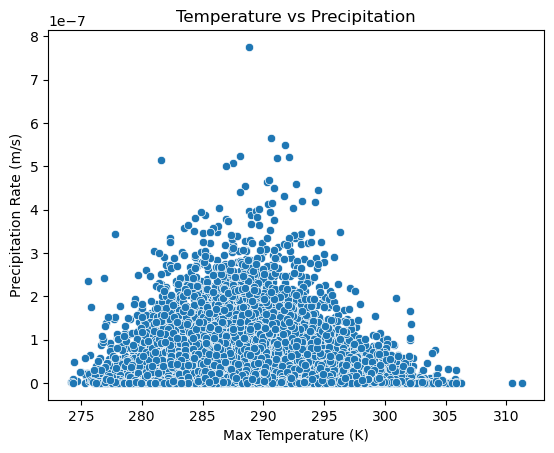

In [57]:
# TREFMXAV_U vs PRECT
sns.scatterplot(x=X1["TREFMXAV_U"], y=X1["PRECT"])
plt.xlabel("Max Temperature (K)")
plt.ylabel("Precipitation Rate (m/s)")
plt.title("Temperature vs Precipitation")
plt.show()

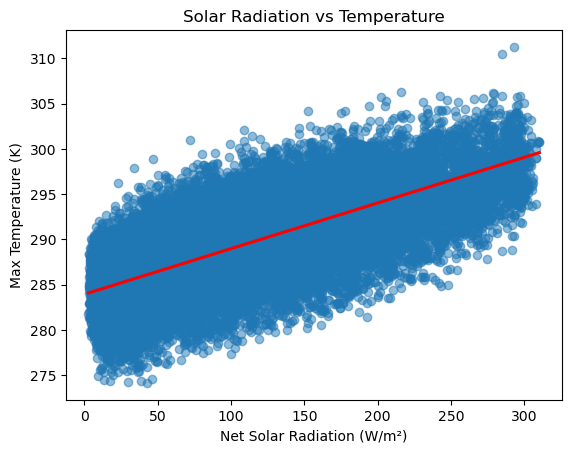

In [58]:
sns.regplot(x=X1["FSNS"], y=X1["TREFMXAV_U"], scatter_kws={"alpha":0.5}, line_kws={"color":"red"})
plt.xlabel("Net Solar Radiation (W/m²)")
plt.ylabel("Max Temperature (K)")
plt.title("Solar Radiation vs Temperature")
plt.show()


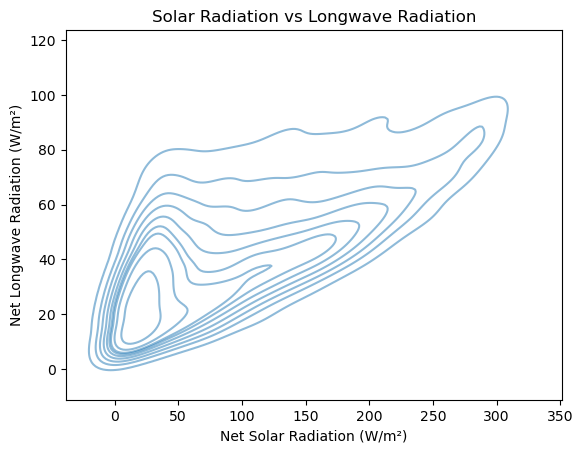

In [59]:
sns.kdeplot(x=X1["FSNS"], y=X1["FLNS"], alpha=0.5)
plt.xlabel("Net Solar Radiation (W/m²)")
plt.ylabel("Net Longwave Radiation (W/m²)")
plt.title("Solar Radiation vs Longwave Radiation")
plt.show()



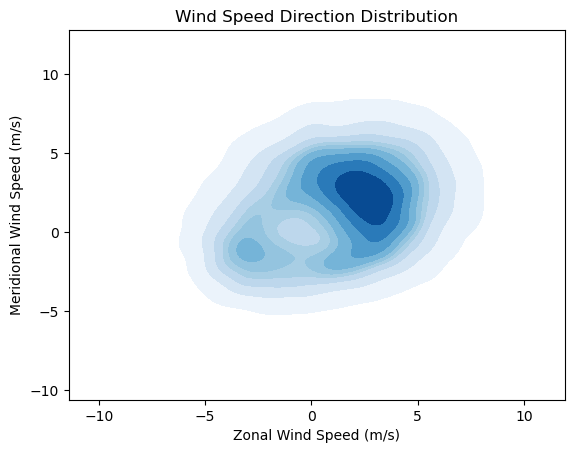

In [60]:
sns.kdeplot(x=X1["UBOT"], y=X1["VBOT"], cmap="Blues", fill=True)
plt.xlabel("Zonal Wind Speed (m/s)")
plt.ylabel("Meridional Wind Speed (m/s)")
plt.title("Wind Speed Direction Distribution")
plt.show()


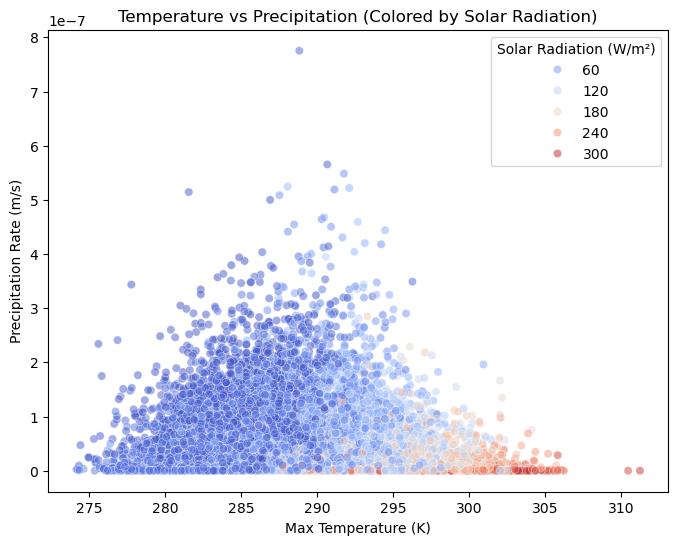

In [61]:

plt.figure(figsize=(8,6))
sns.scatterplot(x=X1["TREFMXAV_U"], y=X1["PRECT"], hue=X1["FSNS"], palette="coolwarm", alpha=0.5)
plt.xlabel("Max Temperature (K)")
plt.ylabel("Precipitation Rate (m/s)")
plt.title("Temperature vs Precipitation (Colored by Solar Radiation)")
plt.legend(title="Solar Radiation (W/m²)")
plt.show()



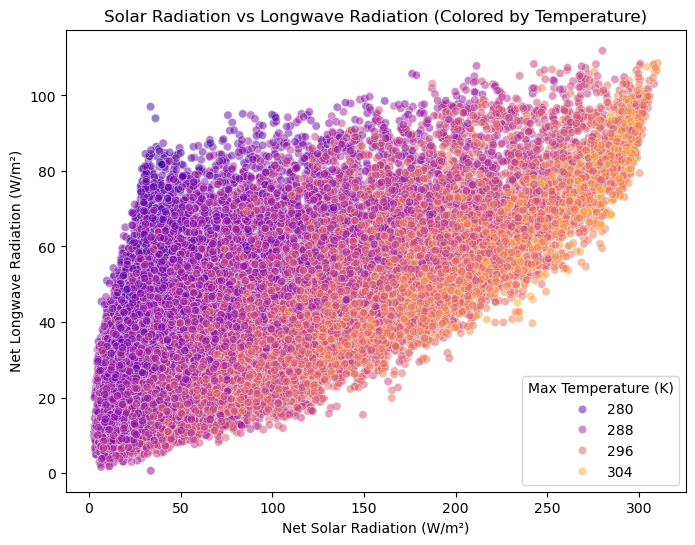

In [62]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X1["FSNS"], y=X1["FLNS"], hue=X1["TREFMXAV_U"], palette="plasma", alpha=0.5)

plt.xlabel("Net Solar Radiation (W/m²)")
plt.ylabel("Net Longwave Radiation (W/m²)")
plt.title("Solar Radiation vs Longwave Radiation (Colored by Temperature)")
plt.legend(title="Max Temperature (K)")
plt.show()


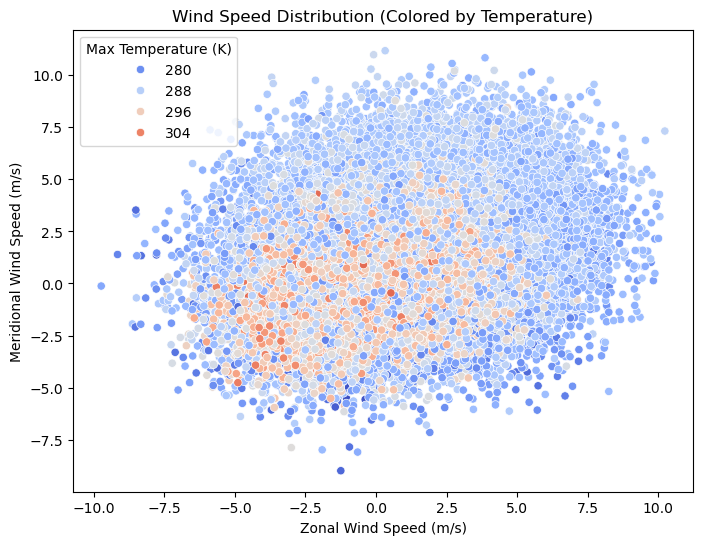

In [63]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X1["UBOT"], y=X1["VBOT"], hue=X1["TREFMXAV_U"], palette="coolwarm")
plt.xlabel("Zonal Wind Speed (m/s)")
plt.ylabel("Meridional Wind Speed (m/s)")
plt.title("Wind Speed Distribution (Colored by Temperature)")
plt.legend(title="Max Temperature (K)")
plt.show()


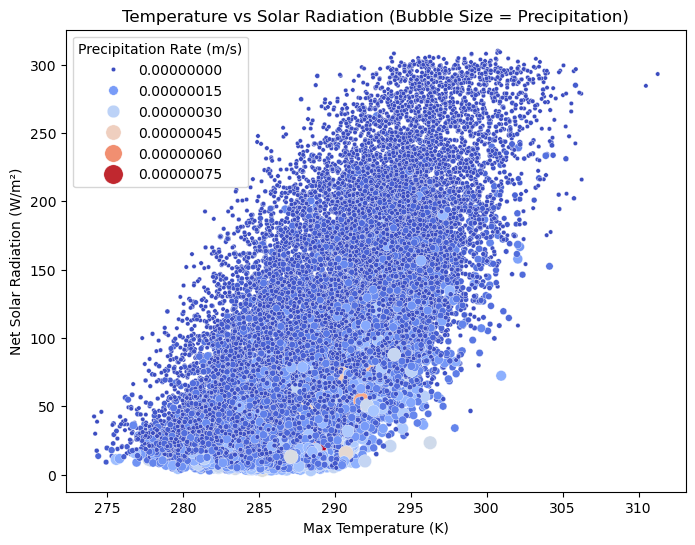

In [86]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X1["TREFMXAV_U"], y=X1["FSNS"], hue=X1["PRECT"], size=X1["PRECT"], sizes=(10,200), palette="coolwarm")
plt.xlabel("Max Temperature (K)")
plt.ylabel("Net Solar Radiation (W/m²)")
plt.title("Temperature vs Solar Radiation (Bubble Size = Precipitation)")
plt.legend(title="Precipitation Rate (m/s)")
plt.show()
